In [2]:
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation

import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [14]:
data = pd.read_csv("dengue_sinan.csv")

C:\Users\gsizi\AppData\Local\Temp\ipykernel_2804\3565987538.py:1: DtypeWarning: Columns (30,31,53,54,55,59,61,63,65,71,83,89,100,116,131,137) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dengue_sinan.csv")


In [23]:
#Retiramos do DataFrame todas as colunas que possuem mais de 30% dos dados ausentes

threshold = len(data) * 0.7

data_cleaned = data.dropna(thresh=threshold, axis=1)

In [24]:
data_cleaned.shape

(620211, 52)

In [25]:
#Removemos todas as linhas que possuem algum dado ausente
data_cleaned = data_cleaned.dropna()

In [26]:
data_cleaned.shape

(307753, 52)

In [12]:
#As colunas que sobraram

print(data_cleaned.columns)

Index(['NU_NOTIFIC', 'TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       'SEM_PRI', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'NM_BAIRRO',
       'CS_ZONA', 'ID_PAIS', 'DT_INVEST', 'FEBRE', 'MIALGIA', 'CEFALEIA',
       'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE',
       'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO',
       'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
       'ACIDO_PEPT', 'AUTO_IMUNE', 'CLASSI_FIN', 'DT_ENCERRA', 'TP_SISTEMA',
       'DT_DIGITA', 'CS_FLXRET', 'IDENT_MICR', 'ID_CNS_SUS_HASHED'],
      dtype='object')


In [32]:
'''
Vamos retirar as colunas que avaliamos ser irrelevantes para a classificação de dengue, 
mantendo as colunas:

'FEBRE','MIALGIA','CEFALEIA','EXANTEMA','VOMITO','NAUSEA','DOR_COSTAS','CONJUNTIVIT',
'ARTRITE','ARTRALGIA','PETEQUIA_N','LEUCOPENIA','LACO','DOR_RETRO','DIABETES',
'HEMATOLOG','RENAL','HIPERTENSA','ACIDO_PEPT',AUTO_IMUNE','CS_SEXO', 'SG_UF','ID_MN_RESI',
'CLASSI_FIN'

'''

coluumns_to_keep = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 
                       'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 
                       'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 
                       'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 
                       'CS_SEXO', 'SG_UF', 'ID_MN_RESI', 'CLASSI_FIN']

# Filtrar o DataFrame para manter apenas as colunas desejadas
data_filtered = data[columns_to_keep]

In [33]:
data_filtered.shape

(620211, 25)

<Axes: >

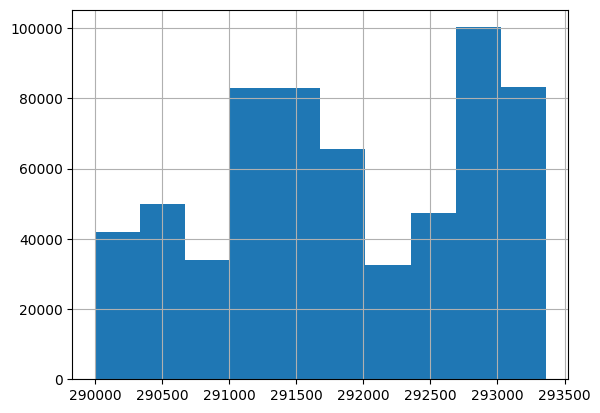

In [42]:
data_filtered['ID_MN_RESI'].hist()